In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

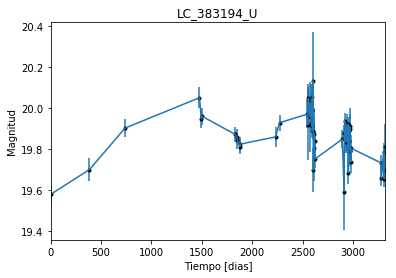

In [2]:
data = np.genfromtxt('LC_383194_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_383194_U')
plt.savefig("LC_383194_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

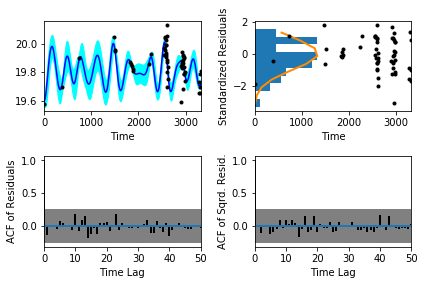

In [5]:
sample.assess_fit()

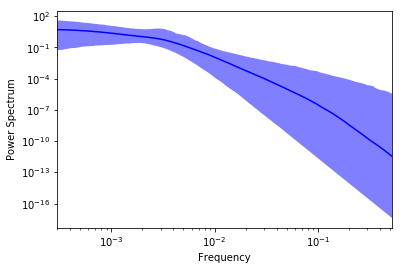

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

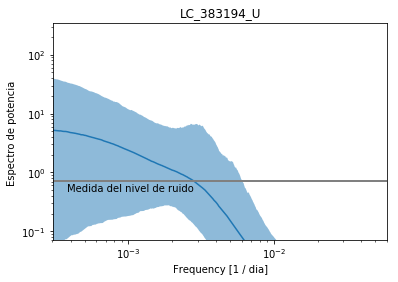

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_383194_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_383194_U')

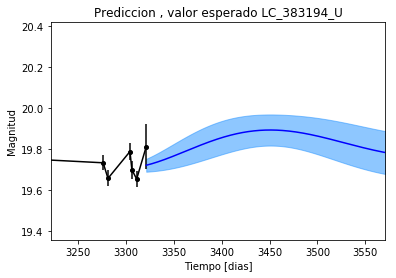

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_383194_U')

Text(0.5,1,'Prediccion, Caminos simulados_LC_383194_U')

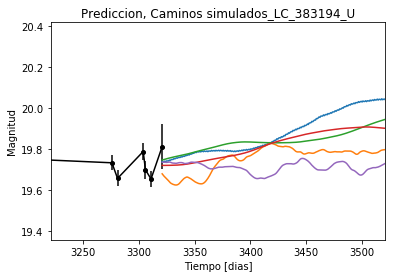

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_383194_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


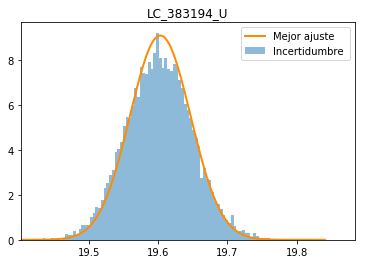

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_383194_U')
plt.savefig("Mejor_ajuste_LC_383194_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_383194_U')

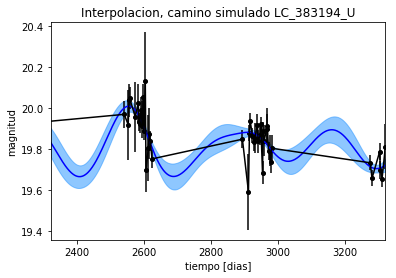

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_383194_U')

Text(0.5,1,'Interpolacion, camino simulado LC_383194_U')

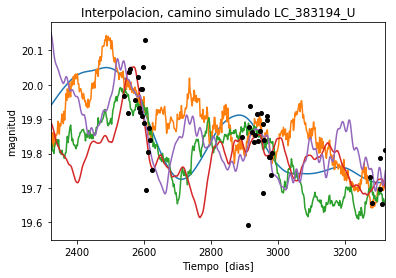

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_383194_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 762.980437051
Median: 0.00614873558587
Standard deviation: 0.171326951309
68% credibility interval: [ 0.00075071  0.10653029]
95% credibility interval: [  3.54059578e-04   7.12182511e-01]
99% credibility interval: [  3.09970587e-04   9.71010617e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 757.685955473
Median: 0.00204623434976
Standard deviation: 0.087634206
68% credibility interval: [ 0.0005368   0.02374099]
95% credibility interval: [ 0.00032844  0.26160061]
99% credibility interval: [  3.04361250e-04   6.99204452e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 708.784834039
Median: 0.0131308597778
Standard dev

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1025.13037126
Median: 87.2277143907
Standard deviation: 1.71089924554
68% credibility interval: [ 85.30022557  88.37657495]
95% credibility interval: [ 82.6204229   89.39374898]
99% credibility interval: [ 80.51844645  89.81212738]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 400.329918206
Median: 0.470267530599
Standard deviation: 2.29190049231
68% credibility interval: [ 0.04192776  3.76624655]
95% credibility interval: [ 0.01425632  7.95651664]
99% credibility interval: [  1.00196385e-02   1.13665886e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 654.292602665
Median: 0.34612281467
Standard deviation: 8.98884379388
68% credibility interval: [ 0.00956999  7.9061796 ]
95% credibility interval: [  8.83

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2507.16359382
Median: 4.605639852e-50
Standard deviation: 2.13411362063e+75
68% credibility interval: [  6.88922687e-87   9.68297293e-12]
95% credibility interval: [  2.51140793e-120   3.88678423e+052]
99% credibility interval: [  1.46130718e-127   2.53555051e+074]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2679.33894033
Median: 19.8143565725
Standard deviation: 0.0650362317939
68% credibility interval: [ 19.76002806  19.86468123]
95% credibility interval: [ 19.66904542  19.93782187]
99% credibility interval: [ 19.59598952  20.01410253]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 472.03658556
Median: 0.00727502736245
Standard deviation: 0.237786077315
68% credibility interval: [ 0.          0.32159244]
95% credibility interval: [ 0.          0.87778434]
99% credibility interval: [ 0.          0.99785345]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 472.03658556
Median: 0.00727502736245
Standard deviation: 0.237786077315
68% credibility interval: [ 0.          0.32159244]
95% credibility interval: [ 0.          0.87778434]
99% credibility interval: [ 0.          0.99785345]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 342.18317945
Median: 0.0
Standard deviation: 0.00137146581045
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1025.13037126
Median: 87.2277143907
Standard deviation: 1.71089924554
68% credibility interval: [ 85.30022557  88.37657495]
95% credibility interval: [ 82.6204229   89.39374898]
99% credibility interval: [ 80.51844645  89.81212738]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2176.97243086
Median: 0.0193049070504
Standard deviation: 0.0232547325195
68% credibility interval: [ 0.01139557  0.03663621]
95% credibility interval: [ 0.00716978  0.07885726]
99% credibility interval: [ 0.00562869  0.14250968]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2473.26070529
Median: 1.08258722718
Standard deviation: 0.167038786966
68% credibility interval: [ 0.93472817  1.26019125]
95% credibility interval: [ 0.81404984  1.45787442]
99% credibility interval: [ 0.75072935  1.63797739]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1124.8561203
Median: 0.000132672469016
Standard deviation: 0.105473655376
68% credibility interval: [  1.30390244e-06   6.36702624e-03]
95% credibility interval: [  2.30421403e-58   1.61105982e-01]
99% credibility interval: [  9.49644459e-79   6.56417005e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 762.980437051
Median: (-0.0386336450909+0j)
Standard deviation: 1.84146797909
68% credibility interval: [-0.66934955+0.j         -0.00471686-0.02828581j]
95% credibility interval: [ -4.47477469e+00+0.j          -2.22462194e-03-0.00304596j]
99% credibility interval: [ -6.10103964e+00+0.j          -1.94760264e-03-0.02005935j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 757.685955473
Median: (-0.0128568696015+0.0485277575075j)
Standard deviation: 1.59228824485
68% credibility interval: [-0.14916904+0.25544963j -0.00337279+0.01810879j]
95% credibility interval: [-1.64368508+1.41662939j -0.00206362+0.j        ]
99% credibility interval: [ -4.39323114e+00+5.32624321j  -1.91235813e-03+0.j        ]
Posterior summary for pa